# Análisis de componentes principales para la reducción de la dimensionalidad



¡Aprenda a realizar PCA aprendiendo las matemáticas detrás del algoritmo y ejecutándolo paso a paso con Python!

En la era moderna de la tecnología, se producen y recopilan cantidades crecientes de datos. Sin embargo, en el aprendizaje automático, demasiados datos pueden ser algo malo. En cierto punto, más características o dimensiones pueden disminuir la precisión de un modelo, ya que hay más datos que deben generalizarse; esto se conoce como la maldición de la dimensionalidad.

La reducción de la dimensionalidad es una forma de reducir la complejidad de un modelo y evitar el sobreajuste. Hay dos categorías principales de reducción de dimensionalidad: selección de características y extracción de características. Mediante la selección de características, seleccionamos un subconjunto de las características originales, mientras que en la extracción de características, derivamos información del conjunto de características para construir un nuevo subespacio de características.

En este tutorial exploraremos la extracción de características. En la práctica, la extracción de características no solo se utiliza para mejorar el espacio de almacenamiento o la eficiencia computacional del algoritmo de aprendizaje, sino que también puede mejorar el rendimiento predictivo al reducir la maldición de la dimensionalidad, especialmente si estamos trabajando con modelos no regularizados.

Específicamente, analizaremos el algoritmo de Análisis de componentes principales (PCA) utilizado para comprimir un conjunto de datos en un subespacio de características de dimensiones más bajas con el objetivo de mantener la mayor parte de la información relevante. Exploraremos:

> Los conceptos y las matemáticas detrás de PCA

> Cómo ejecutar PCA paso a paso desde cero usando Python

> Cómo ejecutar PCA usando la biblioteca Python scikit-learn





## <font color='blue'>Introduction to Principal Component Analysis</font> 

El __análisis de componentes principales (PCA)__  es una técnica de transformación lineal no supervisada que se utiliza ampliamente en diferentes campos, principalmente para la extracción de características y la reducción de la dimensionalidad. Otras aplicaciones populares de PCA incluyen análisis de datos exploratorios y eliminación de ruido de señales en el mercado bursátil, y el análisis de datos de genoma y niveles de expresión génica en el campo de la bioinformática.

PCA nos ayuda a identificar patrones en los datos basados en la correlación entre características. En pocas palabras, PCA tiene como objetivo encontrar las direcciones de variación máxima en datos de alta dimensión y los proyecta en un nuevo subespacio con dimensiones iguales o menores que el original.

Los ejes ortogonales (componentes principales) del nuevo subespacio se pueden interpretar como las direcciones de variación máxima dada la restricción de que los nuevos ejes de características son ortogonales entre sí, como se ilustra en la siguiente figura:

![Componentes Principales](https://raw.githubusercontent.com/robintux/Images4Colabs/master/PCA1.jpeg)

En la figura anterior, x1 y x2 son los ejes de características originales, y PC1 y PC2 son los componentes principales.




## <font color='blue'>Extrayendo los componentes principales paso a paso</font> 

Usaremos el conjunto de datos _Wine_ del repositorio de aprendizaje automático de UCI en nuestro ejemplo. Este conjunto de datos consta de 178 muestras de vino con 13 características que describen sus diferentes propiedades químicas. Puedes encontrar mas informacion en el siguiente enlace :

[Wine Data Set](https://archive.ics.uci.edu/ml/datasets/wine)

Ahora si .... __A programar !!!__






In [0]:
# Importamos el modulo pandas 
import pandas as pd


# Cargamos en memoria el dataset 
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


A continuación, procesaremos los datos del data set  _Wine_ en conjuntos de entrenamiento y de prueba, utilizando una división de 70:30, y estandarizando a la varianza de la unidad:

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Después de completar el preprocesamiento obligatorio, avancemos al segundo paso: construir la matriz de covarianza. La matriz de covarianza simétrica d x d-dimensional, donde d es el número de dimensiones en el conjunto de datos, almacena las covarianzas por pares entre las diferentes características. Por ejemplo, la covarianza entre dos características $x_j$ y $x_k$ en el nivel de población se puede calcular mediante la siguiente ecuación:


$$
\sigma_{jk} = \displaystyle\dfrac{1}{n}\sum_{i=1}^{n} \left( x_j^{(i)} - \mu_j\right) \left( x_k^{(i)} - \mu_k\right)
$$

En donde $\mu_j$  y $\mu_k$ son las medias muestrales de las caracteristicas $j$  y $k$ respectivamente.

Note que la media muestral es cetro si estandarizamos el dataset.Una covarianza positiva entre dos características indica que las características aumentan o disminuyen juntas, mientras que una covarianza negativa indica que las características varían en direcciones opuestas. Por ejemplo, la matriz de covarianza de tres características se puede escribir de la siguiente manera (tenga en cuenta que $\Sigma$ representa la letra mayúscula griega sigma, que no debe confundirse con el símbolo de suma):

$$
\Sigma = 
\begin{bmatrix}
\sigma_1^2  & \sigma_{12} & \sigma_{13}\\
\sigma_{21} & \sigma_2^2 & \sigma_{23} \\
\sigma_{31} & \sigma_{32} & \sigma_3^2 
\end{bmatrix}
$$

__Los vectores propios de la matriz de covarianzas representan los componentes principales (las direcciones de la varianza máxima), mientras que los valores propios correspondientes definirán su magnitud.__ En el caso del conjunto de datos de Wine, obtendríamos 13 vectores propios y valores propios de la matriz de covarianza de 13 x 13 dimensiones.

Ahora, para nuestro tercer paso, obtengamos los pares propios de la matriz de covarianza. Un vector propio $v$ cumple la siguiente condición:

$$ \Sigma \, v = \lambda \, v$$

Aqui, $\lambda$ es un escalar: el autovalor. Dado que el cálculo manual de vectores propios y valores propios es una tarea un tanto tediosa y elaborada, utilizaremos la función <tt>`linalg.eig`</tt>. de NumPy para obtener los pares propios de la matriz de covarianza del dataset Wine:



In [0]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

Usando la función <tt>`numpy.cov`</tt> , calculamos la matriz de covarianzas del conjunto de datos de entrenamiento estandarizado. Usando la función <tt>`linalg.eig`</tt>, realizamos la descomposición propia, que produjo un vector (<tt>`eigen_vals`</tt>) que consta de 13 valores propios y los vectores propios correspondientes almacenados como columnas en una matriz de 13 x 13 dimensiones (<tt>`eigen_vecs`</tt>).

## <font color='blue'>Variación total y explicada</font>
Dado que queremos reducir la dimensionalidad de nuestro conjunto de datos comprimiéndolo en un nuevo subespacio de características, solo seleccionamos el subconjunto de los vectores propios (componentes principales) que contiene la mayor parte de la información (varianza). Los valores propios definen la magnitud de los vectores propios, por lo que tenemos que clasificar los valores propios disminuyendo la magnitud; estamos interesados en los principales vectores propios basados en los valores de sus valores propios correspondientes.

Pero antes de recopilar esos $k$ vectores propios más informativos, grafiquemos los ratios de la  varianza explicada de los valores propios. Los ratios de la varianza explicada de un valor propio $\lambda_j$ es simplemente la fracción de un valor propio $\lambda_j$ y la suma total de los valores propios:

$$
\dfrac{\lambda_j}{\sum_{j=1}^{d} \lambda_{j}}
$$

Usando la función <tt>`cumsum`</tt> NumPy, podemos calcular la suma acumulativa de las variaciones explicadas, que luego graficaremos  mediante la función de paso de matplotlib:

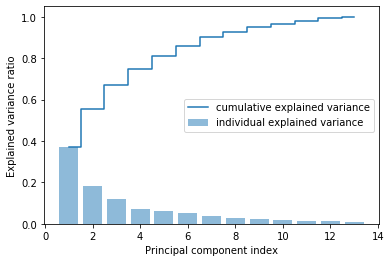

In [0]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

La gráfica resultante indica que el primer componente principal solo representa aproximadamente el 40% de la varianza. Además, podemos ver que los dos primeros componentes principales combinados explican casi el 60% de la varianza en el conjunto de datos.

## <font color='blue'>Transformación de Caracteristicas</font>
Después de haber descompuesto con éxito la matriz de covarianza en pares propios, procedamos ahora con los últimos tres pasos de PCA para transformar el conjunto de datos de Wine en los nuevos ejes de componentes principales.

Ordenaremos los pares propios por orden descendente de los valores propios, construiremos una matriz de proyección a partir de los vectores propios seleccionados y usaremos la matriz de proyección para transformar los datos en el subespacio de dimensiones inferiores.

Comenzamos clasificando los pares propios disminuyendo el tamaño de los valores propios:


In [0]:
# Creamos una lista de tuplas (eigenvalue, eigenvector) 
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Ordenamos la tupla (eigenvalue, eigenvector) del mas grande al mas pequeño
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

A continuación, recopilamos los dos vectores propios que corresponden a los dos valores propios más grandes, para capturar aproximadamente el 60% de la varianza en este conjunto de datos. Tenga en cuenta que solo elegimos dos vectores propios con fines ilustrativos, ya que vamos a trazar los datos a través de un diagrama de dispersión bidimensional más adelante en esta subsección. En la práctica, el número de componentes principales debe determinarse mediante una compensación entre la eficiencia computacional y el rendimiento del clasificador:

In [0]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


Al ejecutar el código anterior, hemos creado una matriz de proyección $W$ de 13 x 2 dimensiones a partir de los dos vectores propios superiores.

Usando la matriz de proyección, ahora podemos transformar una muestra $x$ (representada como un vector de fila de 1 x 13 ) en el subespacio PCA (los componentes principales uno y dos) obteniendo $x'$, ahora un vector de muestra bidimensional que consta de dos nuevas características:

$$ x' = xW$$

In [0]:
X_train_std[0].dot(w)


array([2.38299011, 0.45458499])

Del mismo modo, podemos transformar todo el conjunto de datos de entrenamiento de 124 x 13 dimensiones en los dos componentes principales calculando el producto de matriz de puntos:

$$X' = XW$$

In [0]:
X_train_pca = X_train_std.dot(w)


Por último, visualicemos el conjunto de entrenamiento Wine transformado, ahora almacenado como una matriz de 124 x 2 dimensiones, en un diagrama de dispersión bidimensional:

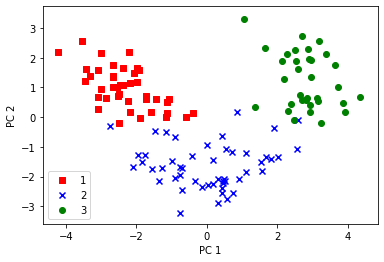

In [0]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Como podemos ver en el gráfico resultante, los datos están más dispersos a lo largo del eje x, el primer componente principal, que el segundo componente principal (eje y), lo cual es consistente con el gráfico de relación de varianza explicada que creamos anteriormente. Sin embargo, podemos ver intuitivamente que un clasificador lineal probablemente podrá separar bien las clases.

Aunque codificamos la información de la etiqueta de clase con fines ilustrativos en el diagrama de dispersión anterior, tenemos que tener en cuenta que PCA es una técnica no supervisada que no utiliza ninguna información de etiqueta de clase.

# <font color='blue'>PCA en scikit-learn</font>

Aunque el enfoque detallado en la subsección anterior nos ayudó a seguir el funcionamiento interno de PCA, ahora discutiremos cómo usar la clase de PCA implementada en <tt>`scikit-learn`</tt>. La clase PCA es otra de las clases de transformadores de <tt>`scikit-learn`</tt>, donde primero ajustamos el modelo usando los datos de entrenamiento antes de transformar tanto los datos de entrenamiento como el conjunto de datos de prueba usando los mismos parámetros del modelo.

Usemos la clase PCA en el conjunto de datos de capacitación de Wine, clasifiquemos las muestras transformadas mediante regresión logística:

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Ahora, utilizando una función personalizada <tt>`plot_decision_regions`</tt>, visualizaremos las regiones de decisión:

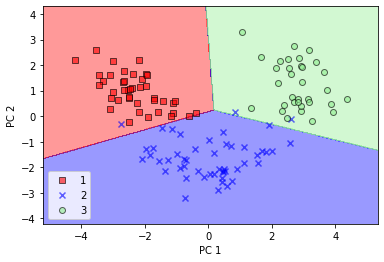

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Al ejecutar el código anterior, ahora deberíamos ver las regiones de decisión para los datos de entrenamiento reducidos a dos ejes componentes principales.

En aras de la exhaustividad, tracemos también las regiones de decisión de la regresión logística en el conjunto de datos de prueba transformado para ver si puede separar bien las clases:

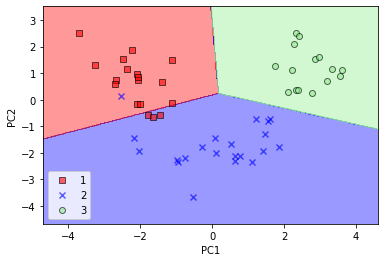

In [0]:
# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

Después de graficar las regiones de decisión para el conjunto de pruebas ejecutando el código anterior, podemos ver que la regresión logística funciona bastante bien en este pequeño subespacio de características bidimensionales y solo clasifica erróneamente muy pocas muestras en el conjunto de datos de prueba.

Si estamos interesados en las razones de varianza explicadas de los diferentes componentes principales, simplemente podemos inicializar la clase PCA con el parámetro n_components establecido en Ninguno, de modo que todos los componentes principales se mantengan y luego se pueda acceder al ratio de varianza explicada a través del atributo explained_variance_ratio_:

In [0]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

Tenga en cuenta que establecemos <tt>`n_components = None`</tt> cuando inicializamos la clase PCA para que devuelva todos los componentes principales ordenados en lugar de realizar una reducción de dimensionalidad.